# Data Engineering process in KNN Machine Learning

### Reading the Training File

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/Datasets"
#%cd /content/drive/My Drive/Colab Notebooks/Datasets/
filepath = "/content/drive/My Drive/Colab Notebooks/Datasets/"

'Copy of 50_Startups.csv'	  'Copy of weatherAUS.csv'
'Copy of Blood-Glucose-Data.csv'   PX03_Churn.csv
'Copy of medical-charges.csv'	   Train_BigMart.csv


In [ ]:
import pandas as pd
data_frame = pd.read_csv(filepath + 'Train_BigMart.csv', header=[0], index_col=[0])

print(data_frame.shape)

(8523, 11)


In [ ]:
# Print the Column Names
data_frame.columns


Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# Print the Data Types
data_frame.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
data_frame.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:

import pandas as pd
data_frame = pd.read_csv(filepath + 'Train_BigMart.csv')

data_frame.shape

(8523, 12)

In [ ]:
data_frame.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Preparation

In [ ]:
model_clean = pd.DataFrame(data_frame)
model_clean.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Cleaning the Data

In [ ]:
model_clean.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:

model_clean["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
model_clean["Item_Fat_Content"] = model_clean["Item_Fat_Content"].replace('reg','Regular')
model_clean["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    3006
LF          316
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
model_clean["Item_Fat_Content"] = model_clean["Item_Fat_Content"].replace(['LF','low fat'],'Low Fat')
model_clean["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#model_clean['Item_Fat_Content'] = model_clean.Item_Fat_Content.astype('category')
#model_clean.Item_Fat_Content.value_counts()

In [ ]:
model_clean["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
#model_clean['Item_Type'] = model_clean.Item_Type.astype('category')
#model_data.Item_Type.value_counts()

In [ ]:
model_clean["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
#model_clean['Outlet_Size'] = model_clean.Outlet_Size.astype('category')
#model_clean.Outlet_Size.value_counts()

In [ ]:
model_clean["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
#model_clean['Outlet_Location_Type'] = model_clean.Outlet_Location_Type.astype('category')
model_clean.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
model_clean["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
#model_clean['Outlet_Type'] = model_clean.Outlet_Type.astype('category')
model_clean.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
model_clean["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
model_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# data_frame.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)


### Missing Values Imputation

In [ ]:
model_impute = pd.DataFrame(model_clean)
#del model_clean

In [ ]:
model_impute.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
model_impute.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### Inputing numerical values

In [ ]:
#missing values in Item_weight and Outlet_size needs to be imputed
mean_wt = model_impute['Item_Weight'].mean() #imputing item_weight with mean
model_impute['Item_Weight'].fillna(mean_wt, inplace=True)

#### Imputing categorical values

In [ ]:
mode_Outlet = model_impute['Outlet_Size'].mode() #imputing outlet size with mode
print(mode_Outlet)
model_impute['Outlet_Size'].fillna(mode_Outlet[0], inplace=True)

0    Medium
dtype: object


In [ ]:
model_impute.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Feature Engineering

In [ ]:
model_impute['Outlet_Age'] = 2022 - model_impute.Outlet_Establishment_Year
model_impute.shape

(8523, 13)

In [ ]:
model_impute.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,24.168133
std,4.226124,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,13.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,18.000000
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000,23.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,35.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,37.000000


In [ ]:
model_data = pd.DataFrame(model_impute)
#del model_impute

In [ ]:
#model_data.drop(['Outlet_Identifier','Outlet_Establishment_Year'], axis = 1, inplace=True)
#model_data.drop(columns = ['Outlet_Identifier','Outlet_Establishment_Year'])
#model_data.drop(columns = ['Item_Identifier','Outlet_Establishment_Year'], inplace=True)

model_data.drop(columns = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], inplace=True)
model_data.shape

(8523, 10)

In [ ]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Outlet_Age            8523 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


## Encoding the Data

In [ ]:
import numpy as np

In [ ]:
target = model_data.Item_Outlet_Sales.astype('int64')
features = model_data.drop('Item_Outlet_Sales', axis=1)

In [ ]:
numeric_cols = features.select_dtypes(include=np.number).columns.tolist()
categorical_cols = features.select_dtypes('object').columns.tolist()

In [ ]:
print(numeric_cols)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']


In [ ]:
print(categorical_cols)

['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [ ]:
features_category_raw = features[categorical_cols]
features_numeric_raw = features[numeric_cols]

In [ ]:
features_category = pd.get_dummies(features_category_raw)
features_category.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
features_category = pd.get_dummies(features_category_raw, drop_first=True)
features_category.head()

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
features_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Item_Fat_Content_Regular         8523 non-null   uint8
 1   Item_Type_Breads                 8523 non-null   uint8
 2   Item_Type_Breakfast              8523 non-null   uint8
 3   Item_Type_Canned                 8523 non-null   uint8
 4   Item_Type_Dairy                  8523 non-null   uint8
 5   Item_Type_Frozen Foods           8523 non-null   uint8
 6   Item_Type_Fruits and Vegetables  8523 non-null   uint8
 7   Item_Type_Hard Drinks            8523 non-null   uint8
 8   Item_Type_Health and Hygiene     8523 non-null   uint8
 9   Item_Type_Household              8523 non-null   uint8
 10  Item_Type_Meat                   8523 non-null   uint8
 11  Item_Type_Others                 8523 non-null   uint8
 12  Item_Type_Seafood                8523 non-null  

In [ ]:
features_transform = pd.get_dummies(features, drop_first=True)
features_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Age                       8523 non-null   int64  
 4   Item_Fat_Content_Regular         8523 non-null   uint8  
 5   Item_Type_Breads                 8523 non-null   uint8  
 6   Item_Type_Breakfast              8523 non-null   uint8  
 7   Item_Type_Canned                 8523 non-null   uint8  
 8   Item_Type_Dairy                  8523 non-null   uint8  
 9   Item_Type_Frozen Foods           8523 non-null   uint8  
 10  Item_Type_Fruits and Vegetables  8523 non-null   uint8  
 11  Item_Type_Hard Drinks            8523 non-null   uint8  
 12  Item_Type_Health and

In [ ]:
X = features_transform[:]
y = target[:]

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNR
model = KNR()

from sklearn.model_selection import cross_validate as RCV
cv_results = RCV(model, X, y,
                scoring = ['r2','neg_root_mean_squared_error'],
                cv=5, return_train_score = True)

print("Metrics",sorted(cv_results.keys()))
print("Training Results",cv_results['train_r2'].mean())
print("Validation Results",cv_results['test_r2'])
print("Validation Results",cv_results['test_r2'].mean())

Metrics ['fit_time', 'score_time', 'test_neg_root_mean_squared_error', 'test_r2', 'train_neg_root_mean_squared_error', 'train_r2']
Training Results 0.6298578198053929
Validation Results [0.47051797 0.42026754 0.37454231 0.46002919 0.45504979]
Validation Results 0.4360813602687751


In [ ]:
#features_dummy = pd.get_dummies(features, drop_first=True)
features_transform.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,24.168133,0.352693,0.029450,0.012906,0.076147,0.080019,0.100434,...,0.140795,0.052212,0.017365,0.610466,0.280183,0.326763,0.393054,0.654347,0.108882,0.109703
std,4.226124,0.051598,62.275067,8.371760,0.477836,0.169073,0.112877,0.265249,0.271338,0.300596,...,0.347831,0.222467,0.130634,0.487673,0.449115,0.469057,0.488457,0.475609,0.311509,0.312538
min,4.555000,0.000000,31.290000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,93.826500,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.053931,143.012800,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,0.094585,185.643700,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn import preprocessing as PPC
scaler = PPC.MinMaxScaler(feature_range=(0, 1))

features_scaled = scaler.fit_transform(features_transform)

X = features_scaled[:]
y = target[:]

In [ ]:
X = pd.DataFrame(X, columns = list(features_transform.columns))
X.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.494352,0.201382,0.465635,0.465339,0.352693,0.029450,0.012906,0.076147,0.080019,0.100434,...,0.140795,0.052212,0.017365,0.610466,0.280183,0.326763,0.393054,0.654347,0.108882,0.109703
std,0.251630,0.157123,0.264327,0.348823,0.477836,0.169073,0.112877,0.265249,0.271338,0.300596,...,0.347831,0.222467,0.130634,0.487673,0.449115,0.469057,0.488457,0.475609,0.311509,0.312538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283120,0.082187,0.265437,0.208333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.494352,0.164228,0.474209,0.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.681453,0.288026,0.655156,0.916667,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNR
model = KNR()


from sklearn.model_selection import cross_validate as RCV
cv_results = RCV(model, X, y,
                scoring = ['r2','neg_root_mean_squared_error'],
                cv=5, return_train_score = True)

print("Metrics",sorted(cv_results.keys()))
print("Training Results",cv_results['train_r2'].mean())
print("Validation Results",cv_results['test_r2'])
print("Validation Results",cv_results['test_r2'].mean())

Metrics ['fit_time', 'score_time', 'test_neg_root_mean_squared_error', 'test_r2', 'train_neg_root_mean_squared_error', 'train_r2']
Training Results 0.6573487630478829
Validation Results [0.49765835 0.45194163 0.46524785 0.47784974 0.51301018]
Validation Results 0.4811415508359705


In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNR
#model = KNR()
model = KNR(n_neighbors=8)


from sklearn.model_selection import cross_validate as RCV
cv_results = RCV(model, X, y,
                scoring = ['r2','neg_root_mean_squared_error'],
                cv=5, return_train_score = True)

print("Metrics",sorted(cv_results.keys()))
print("Training Results",cv_results['train_neg_root_mean_squared_error'].mean())
print("Validation Results",cv_results['test_neg_root_mean_squared_error'])
print("Validation Results",cv_results['test_neg_root_mean_squared_error'].mean())

print("Training Results",cv_results['train_r2'].mean())
print("Validation Results",cv_results['test_r2'])
print("Validation Results",cv_results['test_r2'].mean())

Metrics ['fit_time', 'score_time', 'test_neg_root_mean_squared_error', 'test_r2', 'train_neg_root_mean_squared_error', 'train_r2']
Training Results -1060.9851007575448
Validation Results [-1234.23977145 -1221.35148508 -1182.01455266 -1207.75342998
 -1200.41436053]
Validation Results -1209.154719941771
Training Results 0.6133605492578225
Validation Results [0.50677765 0.46976235 0.48957987 0.50135341 0.51826054]
Validation Results 0.49714676561145466


## Create the Training & Validation Sets

Splitting data into 70% training and 30% test data:

In [ ]:
from sklearn.model_selection import train_test_split as TTS

train , valid = TTS(model_data, train_size = 0.7)

In [ ]:
y_train = train['Item_Outlet_Sales']
x_train = train.drop('Item_Outlet_Sales', axis=1)

y_valid = valid['Item_Outlet_Sales']
x_valid = valid.drop('Item_Outlet_Sales', axis = 1)

Splitting data into 70% training and 30% test data:

In [ ]:
#y = model_data['Item_Outlet_Sales']
#x = model_data.drop('Item_Outlet_Sales', axis=1)

from sklearn.model_selection import train_test_split as TTS

X_train, X_valid, y_train, y_valid = TTS(X, y, train_size=0.7, random_state=1)

### Running the Algorithm

In [ ]:
#import required packages
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

In [ ]:
model = KNR()

In [ ]:
model.fit(X_train, y_train)  #fit the model
model.score(X_train, y_train)

0.6576082262000045

In [ ]:
print(model)

KNeighborsRegressor()


In [ ]:
model=KNR(n_neighbors=3)

model.fit(X_train, y_train)  #fit the model
model.score(X_train, y_train)

0.715344633514154

In [ ]:
y_pred = model.predict(X_valid) #make prediction on validation set

In [ ]:
print(y_pred[0:10])

[ 658.66666667  895.33333333 2886.          997.33333333  792.33333333
 2568.          833.33333333 2033.33333333 1591.66666667 2456.33333333]


In [ ]:
model.score(X_valid, y_valid)

0.4234570505853321

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_valid, y_pred)

0.4234570505853321

In [ ]:
error = sqrt(MSE(y_valid,y_pred)) #calculate rmse
print (error)

1295.0327875491641


In [ ]:
### Run the process for different k values

In [ ]:
rmse_val_list = [] #to store rmse values for different k

for K in range(12):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred = model.predict(X_valid) #make prediction on test set
    error = sqrt(MSE(y_valid, y_pred)) #calculate rmse
    print('RMSE value for k= ' , K , 'is:', error)
    
    rmse_val_list.append(error) #store rmse values
    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))


RMSE value for k=  1 is: 1556.984772292197
RMSE value for k=  2 is: 1345.0692080785
RMSE value for k=  3 is: 1283.377999280271
RMSE value for k=  4 is: 1263.9772510033436
RMSE value for k=  5 is: 1251.0775149104195
RMSE value for k=  6 is: 1245.4026022982086
RMSE value for k=  7 is: 1234.7651211724183
RMSE value for k=  8 is: 1229.2189452960272
RMSE value for k=  9 is: 1235.425365854168
RMSE value for k=  10 is: 1230.3188037011837
RMSE value for k=  11 is: 1229.3393456804395
RMSE value for k=  12 is: 1233.9678831006588
The minimum error we get is  1229.2189452960272
The corresponding K value is  8


In [ ]:
# Five-fold cross-validation of the KNN Classifier
from sklearn.model_selection import cross_val_score
model = KNR(n_neighbors = 8)

scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print('RMSE score of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'RMSE + 1_sd: {scores.mean():.3f} (+/- {scores.std() * 1:.3f})')
print(f'RMSE + 2_sd: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

RMSE score of each fold:  ['-1234.240', '-1221.351', '-1182.015', '-1207.753', '-1200.414']
RMSE + 1_sd: -1209.155 (+/- 17.849)
RMSE + 2_sd: -1209.155 (+/- 35.698)


In [ ]:
# Five-fold cross-validation of the KNN Classifier
from sklearn.model_selection import cross_val_score
model = KNR(n_neighbors = 8)

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print('RMSE score of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'R2 + 1_sd: {scores.mean():.3f} (+/- {scores.std() * 1:.3f})')
print(f'R2 + 2_sd: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

RMSE score of each fold:  ['0.507', '0.470', '0.490', '0.501', '0.518']
R2 + 1_sd: 0.497 (+/- 0.017)
R2 + 2_sd: 0.497 (+/- 0.033)


In [ ]:
from sklearn import metrics
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [ ]:
%%time

#import required packages
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

rmse_val_list = list() #to store rmse values for different k

iter_len = len(X_valid)
iter_size = round(sqrt(iter_len))

for K in range(iter_size):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred = model.predict(X_valid) #make prediction on test set
    error = sqrt(MSE(y_valid, y_pred)) #calculate rmse
    #print('RMSE value for k= ' , K , 'is:', error)
    
    rmse_val_list.append(error) #store rmse values

minError = min(rmse_val_list)
    
print("The minimum error we get is ", minError )
print("The corresponding K value is ", 1+rmse_val_list.index(minError))


The minimum error we get is  1229.2189452960272
The corresponding K value is  8
CPU times: user 19.3 s, sys: 5.39 s, total: 24.7 s
Wall time: 17 s


## Plotting the Values

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

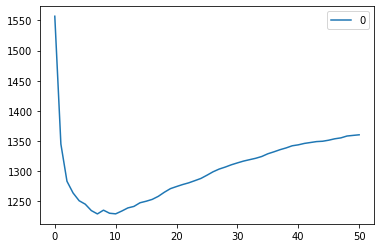

In [ ]:
#curve=pd.DataFrame(rmse_val_list)
#curve.plot() # Elbow curve
curve = pd.DataFrame(rmse_val_list)
curve.plot()